# Assignment 1

This assignment is due on __Sunday 26 February__, by midnight. It pertains to content taught in classes 1-3, i.e., week 1. 

This assignment should be completed in Python, and an PDF file should be submitted, containing both code and written answers. If you like, you may create your own Jupyter Notebook file from scratch, but it is likely easier to modify this one.

Please do not be intimidated by the apparent length of this assignment (it is deceiving!). All required code is a single line. Questions that require identification and/or intepretation will not penalized for brevity of response: if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in class. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to tutorial. We will work with you through the issue.

If you like, you may collaborate with others in the class. If you choose to do so, please indicate with whom you have worked at the top of your PDF. Separate submissions are required.

Any questions can be addressed to Navona ([navona.calarco@mail.utoronto.ca]()) and/or Julia ([julia.gallucci@mail.utoronto.ca]()) before the due-date. Please email your submissions to Julia, with the subject `DSI: Assignment 1, Name`.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Type `Boston?` to learn more about the dataset.

In [7]:
# Import standard libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm

# Import specific objects
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [8]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review the ‘help()’ file)

_(ii)_ What concept ‘defines’ the plotted line?

In [19]:
# Define function
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)

def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

NameError: name 'results' is not defined

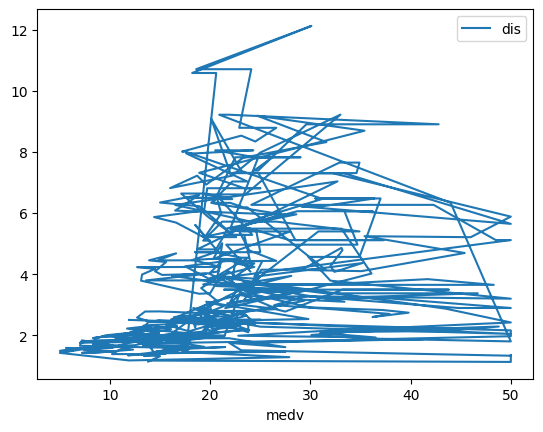

In [17]:
# Plot data
ax = Boston.plot('medv', 'dis')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `mdev` as the response variable Y, and `dis` as the predictor variable X.

In [18]:
# Add your code here

Review your model output to answer the following questions (Hint: use the `summarize` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `lm(y ~ x1 + x2)`).

In [20]:
# Add your code here

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

_(iii)_ Review the model output, using `summarize()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

_(iv)_ We can use the inbuilt `plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

In [21]:
# Add your code here

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: use the syntax `lm(y ~ x1 * x2)`). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [ ]:
# Add your code here

### Question 3: Classification using KNN

We'll now use the `Caravan` dataset from the `ISLP` package. (You may type Caravan? in the console to review details of the dataset.) In this dataset, the response variable of interest is `Purchase`, which indicates if a given customer purchased a caravan insurance policy. We will simultaneously use all other variables in the dataset to predict the response variable.

In [25]:
# Load the "Caravan" dataset using the "load_data" function from the ISLP package
Caravan = load_data('Caravan')
Caravan

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,No
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,Yes
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No


Before fitting any model, it is essential to understand our data. Answer the following questions about the `Caravan` dataset (Hint: use `print`):  _(i)_ How many observations (rows) does the dataset contain?    _(ii)_ How many variables (columns) does the dataset contain?    _(iii)_ What 'variable' type is the response variable `Purchase` (e.g., 'character', 'factor', 'numeric', etc)? What are the 'levels' of the variable?    _(iv)_ How many predictor variables do we have (Hint: all variables other than `Purchase`)?  Next, we must preform 'pre-processing' or 'data munging', to prepare our data for classification/prediction. For KNN, there are three essential steps. A first essential step is to 'standardize' the predictor variables. We can achieve this using the `scale` function, provided as follows:

In [29]:
print(Caravan)

      MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0          33         1        3         2         8       0       5       1   
1          37         1        2         2         8       1       4       1   
2          37         1        2         2         8       0       4       2   
3           9         1        3         3         3       2       3       2   
4          40         1        4         2        10       1       4       1   
...       ...       ...      ...       ...       ...     ...     ...     ...   
5817       36         1        1         2         8       0       6       1   
5818       35         1        4         4         8       1       4       1   
5819       33         1        3         4         8       0       6       0   
5820       34         1        3         2         8       0       7       0   
5821       33         1        3         3         8       0       6       1   

      MGODGE  MRELGE  ...  APERSONG  AG

In [31]:
predictors_standardized <- scale(Caravan[-86]) #Purchase is the #86th column

NameError: name 'predictors_standardized' is not defined

_(v)_ Why is it important to standardize the predictor variables?  _(vi)_ Why did we elect not to standard our response variable `Purchase`?  _(vii)_ A second essential step is to set a random seed. Do so below (Hint: use the `random.seed` function). Why is setting a seed important? Is the particular seed value important? Why or why not?

In [32]:
# Add your code here

_(viii)_ A third essential step is to split our standardized data into separate training and testing sets. We will split into 75% training and 25% testing. The provided code randomly partitions our data, and creates linked training sets for the predictors and response variables. Extend the code to create a non-overlapping test set for the predictors and response variables (Hint: use the 'not' operator, `!`).

In [33]:
#first, create a random vector of T and F values, the same length as the Caravan dataset
split <- sample(c(TRUE, FALSE), nrow(predictors_standardized), replace=TRUE, prob=c(0.75, 0.25))

#define the training set, for X (predictors)
training_X <- predictors_standardized[split, ]

#defining the training set, for Y (response)
training_Y <- Caravan$Purchase[split]

#here, define the testing set, for X (predictors) 
#testing_X <- 

#here, define the testing set, for Y (response) 
#testing_Y <- 

SyntaxError: invalid syntax (4067535741.py, line 8)

_(ix)_ We are finally set to fit the KNN model. In Python, we can use the `KNeighborsClassifier()` function. Fit the KNN with k=1. (You may review arguments to knn by typing `knn?`). 

In [34]:
# Add your code here

Using your fit model, answer the following questions:   
_(x)_ What is the prediction accuracy? (Hint: use the `mean` function, and compare your model to `testing_Y`)  
_(xi)_ What is the predictor error (Hint: as error is the inverse of accuracy, use the 'not' operator, `!`)  

In [35]:
#prediction accuracy rate

#prediction error rate

_(xii)_ How does this prediction error/accuracy compare to what could be achieved via random guesses? To answer this, consider the percent of customers in the `Caravan` dataset who actually purchase insurance, computed below:

In [36]:
#percent of customers who purchase insurance
(sum(Purchase == 'Yes') / sum(Purchase == 'No')) * 100

NameError: name 'Purchase' is not defined

_(xiii)_ Fit a second KNN model, with $K=3$. Does this model perform better (i.e., have higher accuracy, compared to a random guess)?

In [37]:
#fit knn, with k=3

### Question 4: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which is a built-in dataset in R, but can be added to Python. As always, start by reviewing a description of the dataset, by typing `iris?` in the console. 

In [55]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)